In [2]:
!pip install scikit-learn
!pip install ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

In [3]:
# Logistic Regression
class LogisticRegression:
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def fit(self, X, y):
    n_samples, n_features = X.shape

    # Flatten y to ensure it's 1D
    y = y.flatten()

        # Initialize parameters
    self.weights = np.zeros(n_features)
    self.bias = 0

        # Gradient Descent
    for _ in range(self.n_iters):
      # Predict using current model parameters
      linear_model = np.dot(X, self.weights) + self.bias
      y_pred = self.sigmoid(linear_model)

      # Compute gradients
      dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
      db = (1 / n_samples) * np.sum(y_pred - y)

      # Update parameters
      self.weights -= self.lr * dw
      self.bias -= self.lr * db


  def predict(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    y_pred = self.sigmoid(linear_model)
    y_class = [1 if i > 0.5 else 0 for i in y_pred]
    return y_class


In [4]:
# KNN
class KNN:
  def __init__(self, k=3):
    self.k = k
    self.X_train = None
    self.y_train = None

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)

  def _predict(self, x):
        # Compute distances between x and all examples in the training set
    distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
    k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples and flatten them
    k_nearest_labels = [self.y_train[i][0] for i in k_indices]
        # Return the most common class label
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common



In [5]:
# Evaluation Function
def evaluate_acc(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy


In [6]:
def k_fold_cross_validation(X, y, model_class, k=5, **model_args):
    """
    Performs k-fold cross-validation.

    Parameters:
    - X: Features
    - y: Targets
    - model_class: The class of the model to be used (e.g., KNN, LogisticRegression)
    - k: Number of folds
    - model_args: Additional arguments to pass to the model_class constructor

    Returns:
    - A list of accuracy scores for each fold
    """

    # Number of data points
    n = len(X)

    # Indices for the data points
    indices = np.arange(n)

    # Shuffle indices
    np.random.shuffle(indices)

    # Split indices into k partitions
    partitions = np.array_split(indices, k)

    accuracy_scores = []

    # For each partition, treat it as validation and the rest as training
    for i in range(k):
        train_indices = np.concatenate([partitions[j] for j in range(k) if j != i])
        val_indices = partitions[i]

        X_train, y_train = X[train_indices], y[train_indices]
        X_val, y_val = X[val_indices], y[val_indices]

        # Initialize and train model
        model = model_class(**model_args)
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_val_pred = model.predict(X_val)
        accuracy = evaluate_acc(y_val, y_val_pred)
        accuracy_scores.append(accuracy)

    return accuracy_scores


# Ionosphere

In [7]:
# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
ionosphereX = ionosphere.data.features
ionospherey = ionosphere.data.targets

# metadata
print(ionosphere.metadata)

# variable information
print(ionosphere.variables)


{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

In [8]:
# Load the datasets into NumPy objects
ionospherey = ionospherey.replace('g',1)
ionospherey = ionospherey.replace('b',0)
ionosphereX_np = ionosphereX.values
ionospherey_np = ionospherey.values

<ipython-input-8-a82711471d83>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ionospherey = ionospherey.replace('b',0)


In [9]:
#Split the data
ionosphereX_train, ionosphereX_test, ionospherey_train, ionospherey_test = train_test_split(ionosphereX_np, ionospherey_np, test_size=0.2, random_state=10)

In [10]:
# Initialize and train the logistic regression model
ionosphere_model = LogisticRegression(lr=0.001, n_iters=1000)
ionosphere_model.fit(ionosphereX_train, ionospherey_train)

# Predict and evaluate
ionospherey_pred = ionosphere_model.predict(ionosphereX_test)
ionosphere_accuracy = evaluate_acc(ionospherey_test, ionospherey_pred)
print("Accuracy:", ionosphere_accuracy)

Accuracy: 0.6562190041658401


In [11]:
# Find best k-num for KNN
k_values = range(1, 50)  # Checking k from 1 to 50 as an example
performances = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(ionosphereX_train, ionospherey_train)
    ionospherey_test_pred = knn.predict(ionosphereX_test)
    ionosphere_Kaccuracy = evaluate_acc(ionospherey_test, ionospherey_test_pred)
    performances.append(ionosphere_Kaccuracy)

ionosphere_best_k = k_values[np.argmax(performances)]
print(f"Best k is {ionosphere_best_k} with validation accuracy of {max(performances)*100:.2f}%")

KeyboardInterrupt: 

In [12]:
# k-folds cross-validation
num_folds = 15

# for Logistic Regression
accuracies = k_fold_cross_validation(ionosphereX_np, ionospherey_np, LogisticRegression, num_folds, lr=0.001, n_iters=1000)
print(f"Average accuracy of Logistic Regression across {num_folds}-folds: {np.mean(accuracies)*100:.2f}%")

# for KNN
accuracies = k_fold_cross_validation(ionosphereX_np, ionospherey_np, KNN, num_folds, k=ionosphere_best_k)
print(f"Average accuracy of KNN across {num_folds}-folds: {np.mean(accuracies)*100:.2f}%")


Average accuracy of Logistic Regression across 15-folds: 63.26%


NameError: name 'ionosphere_best_k' is not defined

Ratio between g and b is:
 Class
1    225
0    126
Name: count, dtype: int64


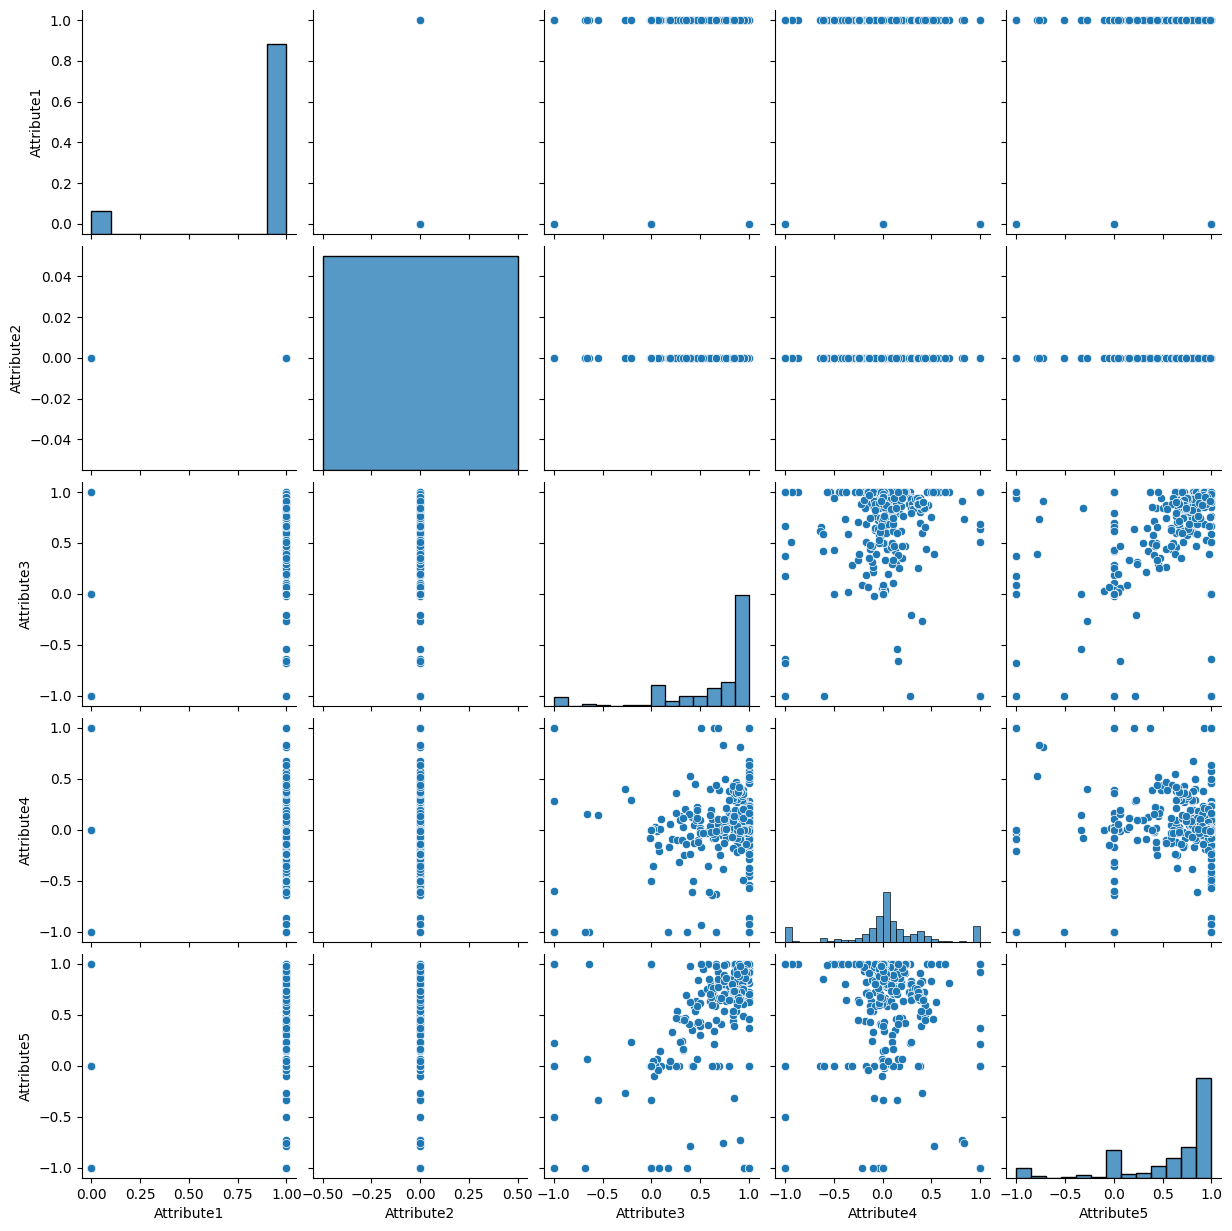

Class distribution:
Class
1    225
0    126
Name: count, dtype: int64

Numerical feature distribution:
       Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
count  351.000000       351.0  351.000000  351.000000  351.000000  351.000000   
mean     0.891738         0.0    0.641342    0.044372    0.601068    0.115889   
std      0.311155         0.0    0.497708    0.441435    0.519862    0.460810   
min      0.000000         0.0   -1.000000   -1.000000   -1.000000   -1.000000   
25%      1.000000         0.0    0.472135   -0.064735    0.412660   -0.024795   
50%      1.000000         0.0    0.871110    0.016310    0.809200    0.022800   
75%      1.000000         0.0    1.000000    0.194185    1.000000    0.334655   
max      1.000000         0.0    1.000000    1.000000    1.000000    1.000000   

       Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute25  \
count  351.000000  351.000000  351.000000   351.000000  ...   351.000000   
mean     0.5500

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class_distribution = ionospherey['Class'].value_counts()

print("Ratio between g and b is:\n", class_distribution)
numerical_feature_distribution = ionosphereX.describe()



correlation_matrix = ionosphereX.corr()

subset_features = ['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5']
scatter_subset = ionosphereX[subset_features]

sns.pairplot(scatter_subset)
plt.show()

print("Class distribution:")
print(class_distribution)

print("\nNumerical feature distribution:")
print(numerical_feature_distribution)

print("\nCorrelation matrix:")
print(correlation_matrix)


# Adult

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
adultX = adult.data.features
adulty = adult.data.targets

# metadata
#print(adult.metadata)

# variable information
#print(adult.variables)


# Change target to the binary value
adulty = adulty.replace(['<=50K','<=50K.'],0)
adulty = adulty.replace(['>50K','>50K.'],1)

# these 2 loops remove any rows that have any missing data
for i in range(len(adultX)-1, 0, -1):
  for col in adultX:
    if (str(adultX[col][i]) == '?' or adulty['income'][i] == '?'):
      adultX = adultX.drop([i], axis = 0)
      adulty = adulty.drop([i], axis = 0)
      break
print(adultX)
print(adultX.isnull().sum())
refined_dataset = adultX.drop(['fnlwgt', 'workclass', 'occupation', 'native-country'], axis=1)
print(refined_dataset)
print(refined_dataset.isnull().sum())
# You should remove any examples with missing or malformed features and note this in your report.




In [ ]:
# Combine the feature set and the target
combined = pd.concat([adultX, adulty], axis=1)

# Drop rows with any missing values
combined_clean = combined.dropna()

# Split the cleaned dataset back into feature set and target
adultX_clean = combined_clean.drop(columns=[adulty.columns[0]])
adulty_clean = combined_clean[adulty.columns[0]]

# One-hot encoding for categorical variables
adultX_clean = pd.get_dummies(adultX_clean)

# Convert target to binary: '>50K' as 1 and '<=50K' as 0
adulty_clean = np.where((adulty_clean == '>50K') | (adulty_clean == '>50K.'), 1, 0).reshape(-1, 1)

# Convert cleaned dataframe to NumPy array
adultX_np = adultX_clean.to_numpy()
adulty_np = adulty_clean

In [ ]:
#Split the data
adultX_train, adultX_test, adulty_train, adulty_test = train_test_split(adultX_np, adulty_np, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the logistic regression model
adult_model = LogisticRegression(lr=0.001, n_iters=1000)
adult_model.fit(adultX_train, adulty_train)

# Predict and evaluate
adulty_pred = adult_model.predict(adultX_test)
adult_accuracy = evaluate_acc(adulty_test, adulty_pred)
print("Accuracy:", adult_accuracy)

In [ ]:
# Find best k-num for KNN
k_values = range(1, 2)  # Checking k from 1 to 5 as an example
performances = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(adultX_train, adulty_train)
    adulty_test_pred = knn.predict(adultX_test)
    adult_Kaccuracy = evaluate_acc(adulty_test, adulty_test_pred)
    performances.append(adult_Kaccuracy)

adult_best_k = k_values[np.argmax(performances)]
print(f"Best k is {adult_best_k} with validation accuracy of {max(performances)*100:.2f}%")

In [ ]:
# k-folds cross-validation
num_folds = 15

# for Logistic Regression
accuracies = k_fold_cross_validation(adultX_np, adulty_np, LogisticRegression, num_folds, lr=0.001, n_iters=1000)
print(f"Average accuracy of Logistic Regression across {num_folds}-folds: {np.mean(accuracies)*100:.2f}%")

# for KNN
accuracies = k_fold_cross_validation(adultX_np, adulty_np, KNN, num_folds, k=adult_best_k)
print(f"Average accuracy of KNN across {num_folds}-folds: {np.mean(accuracies)*100:.2f}%")


In [ ]:
import numpy
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
# Compute basic statistics on the data to understand it better. E.g., what are the distributions of the positive vs.
# negative classes, what are the distributions of some of the numerical features? what are the correlations between
# the features? how do the scatter plots of pair-wise features look like for some subset of features?


print("Age")
age_mean = numpy.mean(adultX["age"])
age_median = numpy.median(adultX["age"])
age_std = statistics.stdev(adultX["age"])
print("Mean age: ", age_mean)
print("Median Age: ", age_median)
print("Std Age: ", age_std)


print("Education_num")
edu_num_mean = numpy.mean(adultX["education-num"])
edu_num_median = numpy.median(adultX["education-num"])
edu_num_std = statistics.stdev(adultX["education-num"])
print("Mean education-num: ", edu_num_mean)
print("Median education-num: ", edu_num_median)
print("Std education-num: ", edu_num_std)


print("capital-gain")
capital_gain_mean = numpy.mean(adultX["capital-gain"])
capital_gain_median = numpy.median(adultX["capital-gain"])
capital_gain_std = statistics.stdev(adultX["capital-gain"])
print("Mean education-num: ", capital_gain_mean)
print("Median education-num: ", capital_gain_median)
print("Std education-num: ", capital_gain_std)



print("capital-loss")
capital_loss_mean = numpy.mean(adultX["capital-loss"])
capital_loss_median = numpy.median(adultX["capital-loss"])
capital_loss_std = statistics.stdev(adultX["capital-loss"])
print("Mean education-num: ", capital_loss_mean)
print("Median education-num: ", capital_loss_median)
print("Std education-num: ", capital_loss_std)



print("hours-per-week")
hours_per_week_mean = numpy.mean(adultX["hours-per-week"])
hours_per_week_median = numpy.median(adultX["hours-per-week"])
hours_per_week_std = statistics.stdev(adultX["hours-per-week"])
print("Mean education-num: ", hours_per_week_mean)
print("Median education-num: ", hours_per_week_median)
print("Std education-num: ", hours_per_week_std)



#Distribution of Income
income = adulty["income"].value_counts()
plt.figure()
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=0)
income.plot(kind='bar', color=['skyblue', 'orange'])
plt.show()





#Correlations between numerical features
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numerical_corr = adultX[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()







# Rice Dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from ucimlrepo import fetch_ucirepo


rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
rice_X = rice_cammeo_and_osmancik.data.features
rice_y = rice_cammeo_and_osmancik.data.targets #cammeo =0, osmancik =1
refined_rice_X = []
for i in range(len(rice_X)):
  temp = []
  for col in rice_X:
    temp.append(rice_X[col][i])
  refined_rice_X.append(temp)

#refined_rice_y = [0 if rice_y['Class'][i] == 'Cammeo' else 1 for i in range(len(rice_y))]
rice_y = rice_y.replace('Cammeo', 0)
rice_y = rice_y.replace('Osmancik', 1)
refined_rice_y = rice_y.values

In [ ]:
plt.hist(rice_y)
plt.gca().set(title='Frequency Histogram', ylabel='Count')
plt.show()

rice_features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']
rice_corr = rice_X[rice_features].corr()
plt.figure(figsize=(10, 8))
sn.heatmap(rice_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

rice_scatter_subset = rice_X[rice_features]
sn.pairplot(rice_scatter_subset)
plt.show()

rice_num_features = rice_X.describe()

print("Numerical Features of the Rice Dataset")
print(rice_num_features)

In [ ]:
import statistics
print("Area")
area_mean = np.mean(rice_X["Area"])
area_median = np.median(rice_X["Area"])
print("Mean Area: ", area_mean)
print("Median Area: ", area_median)

print("Perimeter")
perimeter_mean = np.mean(rice_X["Perimeter"])
perimeter_median = np.median(rice_X["Perimeter"])
print("Mean Area: ", perimeter_mean)
print("Median Area: ", perimeter_median)

print("Eccentricity")
eccentricity_mean = np.mean(rice_X["Eccentricity"])
eccentricity_median = np.median(rice_X["Eccentricity"])
print("Mean Area: ", eccentricity_mean)
print("Median Area: ", eccentricity_median)

print("Convex Area")
convex_mean = np.mean(rice_X["Convex_Area"])
convex_median = np.median(rice_X["Convex_Area"])
print("Mean Area: ", convex_mean)
print("Median Area: ", convex_median)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
"""
class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
      self.X_train = X
      self.y_train = y

  def euclidean_distance(self, x1, x2):
      x1 = np.array(x1, dtype=float)
      x2 = np.array(x2, dtype=float)
      return np.sqrt(np.sum((x1 - x2) ** 2))

  def predict(self, X):
      y_pred = [self._predict(x) for x in X]
      return np.array(y_pred)

  def _predict(self, x):
      # Compute distances
      distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

      # Sort by distance and return indices of the first 'k' neighbors
      k_indices = np.argsort(distances)[:self.k]

      # Extract the labels of the 'k' nearest neighbor training samples
      k_nearest_labels = [self.y_train[i] for i in k_indices]

      # Return the most common class label among the k-nearest neighbors
      most_common = np.bincount(k_nearest_labels)
      return most_common.argmax()
  def evaluate_acc(self, y_pred, y_test):
    acc = np.sum(y_pred == y_test)/len(y_test)
    return acc
"""

#X_rice_train, X_rice_test, y_rice_train, y_rice_test = train_test_split(refined_rice_X, refined_rice_y, test_size=0.2, random_state=123)
split_index = int(len(refined_rice_X) * 0.8)
X_rice_train = refined_rice_X[:split_index]
X_rice_test = refined_rice_X[split_index:]

y_rice_train = refined_rice_y[:split_index]
y_rice_test = refined_rice_y[split_index:]
#knn model
knnModel = KNN(k=3)
knnModel.fit(np.array(X_rice_train), np.array(y_rice_train))

knn_predictions = knnModel.predict(np.array(X_rice_test))
rice_knn_acc = evaluate_acc(knn_predictions, y_rice_test)
print("Rice Dataset KNN Accuracy: ", rice_knn_acc)

Rice Dataset KNN Accuracy:  0.8753280839895013


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

"""class LogisticRegression():
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def sigmoid(self, x):
    return 1/(1+ np.exp(-x))

  def fit(self, X, y):
    n_samples , n_features = X.shape
    self.weights = np.zeros(n_features, dtype=np.float64)
    self.bias = 0

    for i in range(self.n_iters):
      linear = np.dot(X, self.weights) + self.bias
      predictions = self.sigmoid(linear)

      dw = (1/n_samples) * np.dot(X.T, (predictions - y))
      db = (1/n_samples) * np.sum(predictions - y) #bias

      self.weights = self.weights - self.lr * dw
      self.bias = self.bias  - self.lr*db

  def predict(self, X):
    linear = np.dot(X,self.weights) + self.bias
    y_predictions = self.sigmoid(linear)
    predict = None

    class_pred = [ 0 if y <= 0.5 else 1 for y in y_predictions]
    return class_pred
  def evaluate_acc(self, y_pred, y_test):
    acc = 0
    for i in range(len(y_test)):
      if (y_pred[i] == y_test[i]):
        acc = acc + 1
    return acc/len(y_test)
def evaluate_acc( y_pred, y_test):
  acc = 0
  for i in range(len(y_test)):
    if (y_pred[i] == y_test[i]):
      acc = acc + 1
  return acc/len(y_test)"""
#logistic Regression

split_index = int(len(refined_rice_X) * 0.8)
X_rice_train = refined_rice_X[:split_index]
X_rice_test = refined_rice_X[split_index:]

y_rice_train = refined_rice_y[:split_index]
y_rice_test = refined_rice_y[split_index:]

mean = np.mean(X_rice_train, axis = 0)
std = np.std(X_rice_train, axis=0)
X_rice_train2 = (X_rice_train - mean) / std

LRModel = LogisticRegression()
LRModel.fit(np.array(X_rice_train2), np.array(y_rice_train))

mean = np.mean(X_rice_test, axis = 0)
std = np.std(X_rice_test, axis=0)
X_rice_test2 = (X_rice_test - mean) / std
LR_predictions = LRModel.predict(X_rice_test2)

#lr_acc = np.sum(LR_predictions == y_rice_train) / len(y_rice_test)
rice_lr_acc = evaluate_acc(LR_predictions, y_rice_test)
print("Logistic Regression Accuracy: ", rice_lr_acc)

Logistic Regression Accuracy:  0.49081364829396323


Logistic Regression accuracy is probably low because of the way I split the data into training and testing data. When I loaded the data into the array refined_rice_X and refined_rice_y, all the data with result 0 was at the start and all the results with result 1 were at the end. The testing data uses the last 20% of the original data so most of the results are probably of one result and all of the training was based on the other result.

when spliting the data useing
X_rice_train, X_rice_test, y_rice_train, y_rice_test = train_test_split(refined_rice_X, refined_rice_y, test_size=0.2, random_state=123)

the accuracy of the logistic regression is 0.9173228346456693. That function shuffles the data and leads to better testing and training sets

In [ ]:
rice_scores = []
for i in range(1, 11):
  knnModel = KNN(k=i)
  knnModel.fit(X_rice_train, y_rice_train)
  knn_predictions = knnModel.predict(np.array(X_rice_test))
  knn_acc = evaluate_acc(np.array(knn_predictions), np.array(y_rice_test))
  rice_scores.append(knn_acc)

print(rice_scores)
print("The K value with the highest Accuracy is K=3 with an accuracy of ", rice_scores[2])


In [ ]:
plt.title("Rice k-value comparison")
x = np.arange(1,11)
y = np.array(rice_scores)
plt.xlabel("K Value")
plt.ylabel("accuracy")
plt.plot(x, y,)
plt.show()

In [ ]:
LRModel = LogisticRegression(lr=0.01)
LRModel.fit(np.array(X_rice_train2), np.array(y_rice_train))
LR_predictions = LRModel.predict(X_rice_test2)
lr_acc = evaluate_acc(LR_predictions, y_rice_test)
print("Logistic Regression with LR=0.01 Accuracy: ", lr_acc)

LRModel = LogisticRegression(lr=0.0001)
LRModel.fit(np.array(X_rice_train2), np.array(y_rice_train))
LR_predictions = LRModel.predict(X_rice_test2)
lr_acc = evaluate_acc(LR_predictions, y_rice_test)
print("Logistic Regression with LR=0.0001 Accuracy: ", lr_acc)

LRModel = LogisticRegression(lr=0.00001)
LRModel.fit(np.array(X_rice_train2), np.array(y_rice_train))
LR_predictions = LRModel.predict(X_rice_test2)
lr_acc = evaluate_acc(LR_predictions, y_rice_test)
print("Logistic Regression with LR=0.00001 Accuracy: ", lr_acc)

LRModel = LogisticRegression(lr=0.000001)
LRModel.fit(np.array(X_rice_train2), np.array(y_rice_train))
LR_predictions = LRModel.predict(X_rice_test2)
lr_acc = evaluate_acc(LR_predictions, y_rice_test)
print("Logistic Regression with LR=0.000001 Accuracy: ", lr_acc)

In [ ]:
LR_fold_rice_scores = k_fold_cross_validation(np.array(refined_rice_X), np.array(refined_rice_y), LogisticRegression, k=5)
print(LR_fold_rice_scores)
print(f"Average accuracy of Logistic Regression across {num_folds}-folds: {np.mean(LR_fold_rice_scores)*100:.2f}%")

KNN_fold_rice_scores = k_fold_cross_validation(np.array(refined_rice_X), np.array(refined_rice_y), KNN, k=5)
print(KNN_fold_rice_scores)
print(f"Average accuracy of KNN across {num_folds}-folds: {np.mean(KNN_fold_rice_scores)*100:.2f}%")

# Spambase

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
spamX = spambase.data.features
spamy = spambase.data.targets

# metadata
print(spambase.metadata)

# variable information
print(spambase.variables)

spamX=spamX.dropna()

print(spamX)
print(spamy)

spamX_numpy = spamX.to_numpy()
spamy_numpy = spamy.to_numpy()


In [ ]:
import seaborn as sns
# Count the occurrences of each class
class_counts = spamy.value_counts()
print(class_counts)
# Create a bar chart for class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'red'], edgecolor='black')
plt.title('Email Distribution')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate the correlation matrix
correlation_matrix = spamX.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()




In [ ]:
#Split data
spamX_numpy_train, spamX_numpy_test, spamy_numpy_train, spamy_numpy_test = train_test_split(spamX_numpy, spamy_numpy, test_size=0.2, random_state=20)
#Logistic Regression
spamlr=LogisticRegression(lr=0.01, n_iters=1000)
spamlr.fit(spamX_numpy_train, spamy_numpy_train)
spampr=spamlr.predict(spamX_numpy_test)
spam_acc=evaluate_acc(spamy_numpy_test, spampr)
print("Logistic regression accuracy:", spam_acc)

#KNN
bestk=[]
for i in range(1, 5):
  spamknn=KNN(k=i)
  spamknn.fit(spamX_numpy_train, spamy_numpy_train)
  spamkpr=spamknn.predict(spamX_numpy_test)
  spamk_acc=evaluate_acc(spamy_numpy_test, spamkpr)
  bestk.append(spamk_acc)
print("KNN accuracy:", bestk)
print("Best k:", max(bestk))


<ipython-input-7-44ee19ba0726>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Logistic regression accuracy: 0.5925438643027159
KNN accuracy: [0.5201363763364422, 0.5391250835552632, 0.5224317145716842, 0.5362037439831369]
Best k: 0.5391250835552632
